In [1]:
import torch
from torch.utils.data import DataLoader
import torch.optim as optim

import time

import numpy as np

import sys
sys.path.insert(0, './')

from models import GaussianGalaxies, sample_uniform
from vae import VAE

device = 'cuda:0'

import matplotlib.pyplot as plt
%matplotlib inline

# Create dataset

In [2]:
batch_size = 64
n_images = batch_size * 200

slen = 25

dataset = GaussianGalaxies(n_images = n_images, 
                           slen = slen, 
                           f_range = [1000, 1000],
                           # a_range = [np.pi/2, np.pi/2],
                           d_range = [30, 30],
                           e_range = [0.5, 0.5])
data_loader = DataLoader(dataset, batch_size=batch_size)

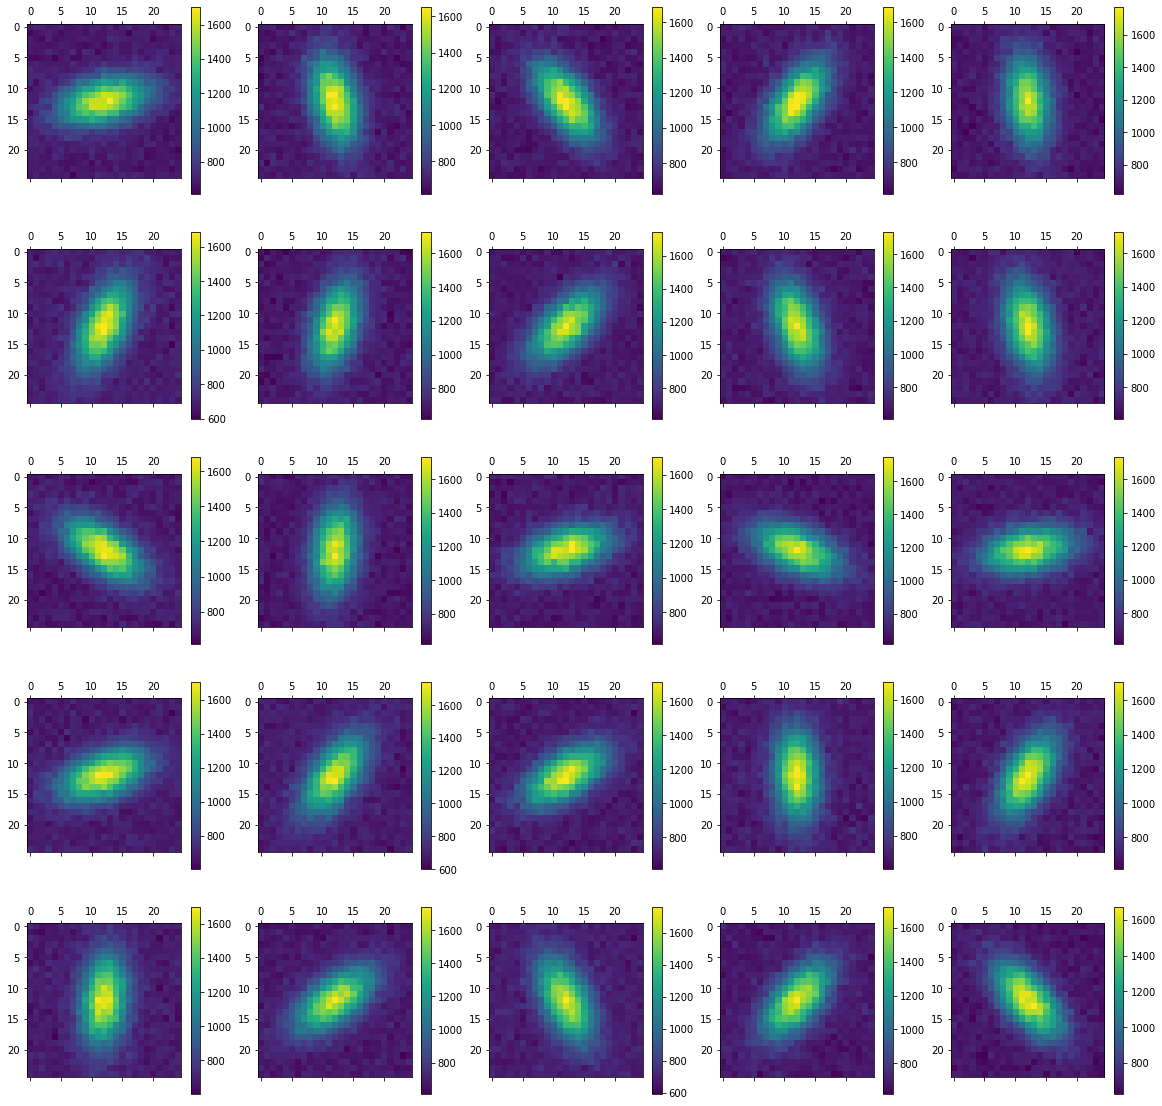

In [3]:
fig, ax = plt.subplots(5, 5, figsize=(20, 20))

for i in range(25): 
    
    indx = np.random.choice(n_images)
    
    x0 = i // 5
    x1 = i % 5
    
    image = dataset[indx]
    
    im = ax[x0, x1].matshow(image.cpu())
    
    fig.colorbar(im, ax = ax[x0, x1])

# Define VAE

In [19]:
galaxy_vae = VAE(slen = slen)
galaxy_vae.to(device)

VAE(
  (encoder): MLPEncoder(
    (fc1): Linear(in_features=625, out_features=528, bias=True)
    (fc2): Linear(in_features=528, out_features=528, bias=True)
    (fc3): Linear(in_features=528, out_features=16, bias=True)
    (tanh): Tanh()
  )
  (decoder): MLPDecoder(
    (fc1): Linear(in_features=8, out_features=528, bias=True)
    (fc2): Linear(in_features=528, out_features=528, bias=True)
    (fc3): Linear(in_features=528, out_features=625, bias=True)
    (tanh): Tanh()
  )
)

In [20]:
for _, images in enumerate(data_loader): 
    break

In [21]:
recon_mean, latent_mean, latent_log_std, _ = \
            galaxy_vae.forward(images)

In [22]:
from vae import get_kl_q_standard_normal

In [23]:
# kl term
kl_q = get_kl_q_standard_normal(latent_mean, latent_log_std)

In [24]:
kl_q

tensor([0.9705, 0.8148, 0.7567, 0.6298, 0.6909, 0.7704, 0.7400, 0.4353, 0.4702,
        0.6148, 0.8416, 0.7901, 0.8330, 0.7641, 1.1088, 0.6615, 0.7560, 0.5309,
        0.6769, 1.0140, 0.6064, 0.9068, 0.8729, 0.8200, 0.6718, 1.0136, 0.6346,
        0.8128, 0.9976, 0.6427, 0.7014, 0.8889, 0.9344, 0.7287, 0.6893, 0.6904,
        0.3407, 0.7847, 0.6818, 0.8725, 0.7857, 0.6077, 0.5320, 0.7775, 0.6497,
        0.4450, 0.7256, 0.9525, 0.8868, 0.9324, 0.6815, 0.6423, 0.5542, 0.4477,
        0.8169, 0.5531, 1.0373, 0.6070, 0.6134, 0.5868, 0.9987, 0.8604, 0.5918,
        0.7333], device='cuda:0', grad_fn=<MulBackward0>)

# Train 

In [9]:
optimizer = optim.Adam(galaxy_vae.parameters())

In [10]:
n_epochs = 30

In [11]:
t0 = time.time() 

for epoch in range(n_epochs): 
    
    avg_loss = 0.
    
    for _, images in enumerate(data_loader):
        loss = galaxy_vae.get_loss(images).mean()
        optimizer.zero_grad()

        loss.backward()
        optimizer.step()

        avg_loss += loss 
        
    print('epoch [{}]. loss = {}'.format(epoch, avg_loss / len(data_loader)))

print('done. Elapsed {:.03f}sec'.format(time.time() - t0))

epoch [0]. loss = 25137.314453125
epoch [1]. loss = 16960.423828125
epoch [2]. loss = 12867.4775390625
epoch [3]. loss = 10405.7119140625
epoch [4]. loss = 8819.3291015625
epoch [5]. loss = 7755.7666015625
epoch [6]. loss = 7022.2841796875
epoch [7]. loss = 6507.921875
epoch [8]. loss = 6142.103515625
epoch [9]. loss = 5880.82275390625
epoch [10]. loss = 5694.2275390625
epoch [11]. loss = 5560.423828125
epoch [12]. loss = 5465.044921875
epoch [13]. loss = 5398.2548828125
epoch [14]. loss = 5351.13916015625
epoch [15]. loss = 5318.673828125
epoch [16]. loss = 5296.89306640625
epoch [17]. loss = 5282.03369140625
epoch [18]. loss = 5272.8125
epoch [19]. loss = 5266.6904296875
epoch [20]. loss = 5263.2666015625
epoch [21]. loss = 5261.27099609375
epoch [22]. loss = 5259.7265625
epoch [23]. loss = 5259.32470703125
epoch [24]. loss = 5259.0078125
epoch [25]. loss = 5258.88818359375
epoch [26]. loss = 5258.90625
epoch [27]. loss = 5335.13916015625
epoch [28]. loss = 5256.9453125
epoch [29]. l

In [12]:
galaxy_vae.get_loss(images).mean()

tensor(5257.3662, device='cuda:0', grad_fn=<MeanBackward0>)

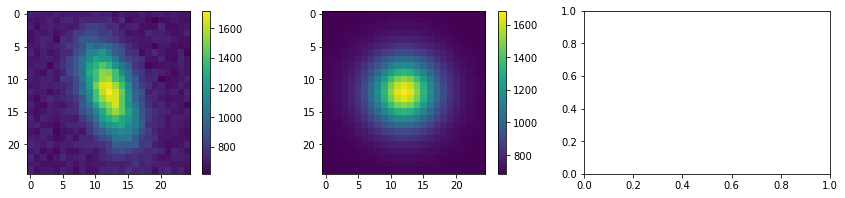

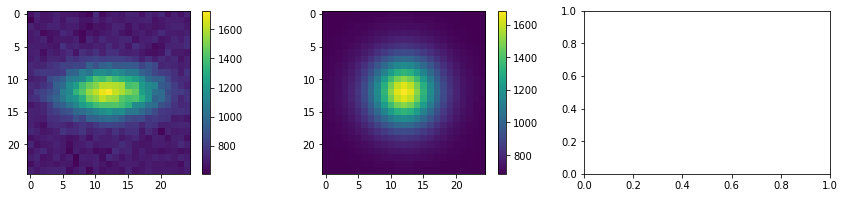

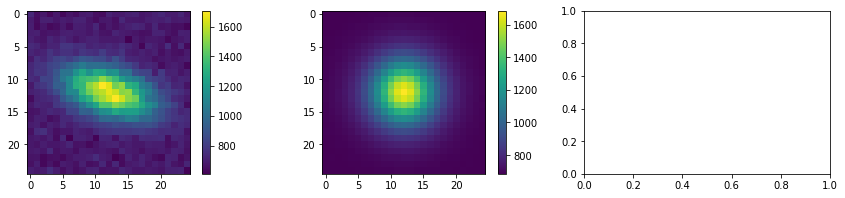

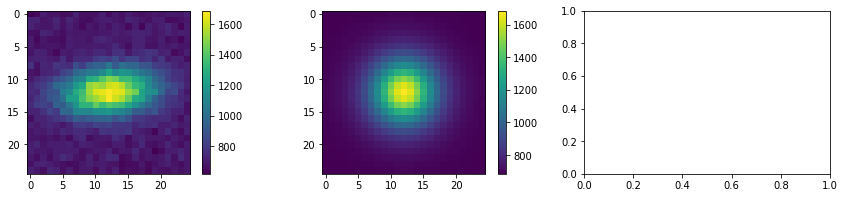

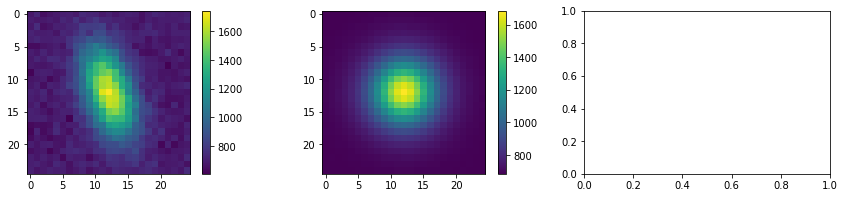

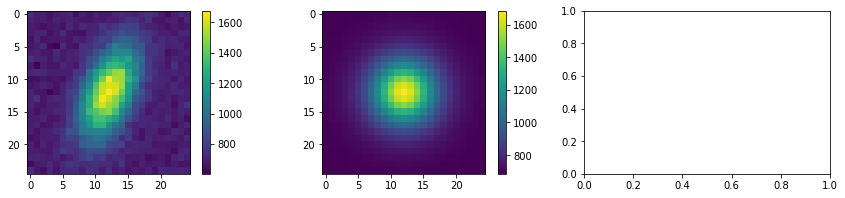

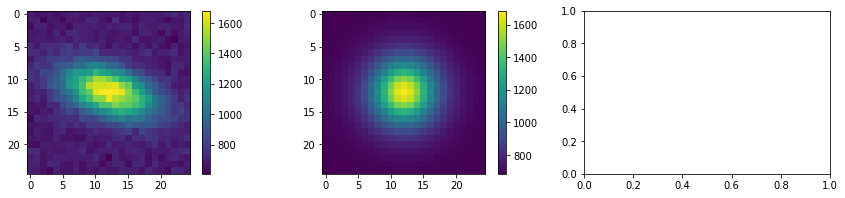

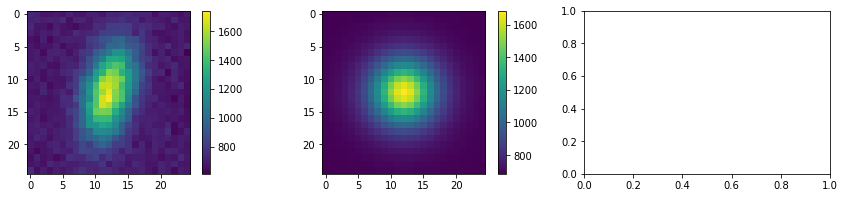

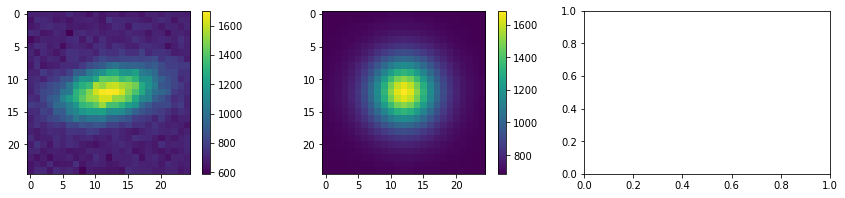

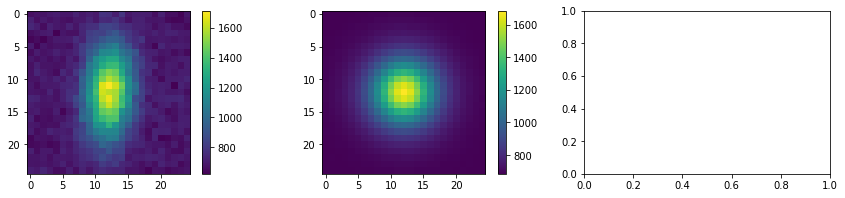

In [13]:
for images in data_loader:
    break

recon_mean = galaxy_vae(images)[0]

for i in range(10): 
    
    fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(15, 3))

    
    # plot image
    im1 = ax1.imshow(images[i].cpu())
    fig.colorbar(im1, ax=ax1)
    
    im2 = ax2.imshow(recon_mean[i].detach().cpu())
    fig.colorbar(im2, ax=ax2)
    
#     im3 = ax3.imshow(var * 0.)
#     fig.colorbar(im3, ax=ax3)
    
    
#     diff = (obs - recon) # / torch.sqrt(var) 
#     vmax = diff.abs().max()
#     im4 = ax4.imshow(diff, vmax = vmax, vmin = -vmax, cmap = plt.get_cmap('bwr'))
#     fig.colorbar(im4, ax = ax4)
    
#     fig.tight_layout()